In [1]:
%pylab inline
from keras.datasets import mnist
import mxnet as mx
from mxnet import nd
from mxnet import autograd
import random

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using CNTK backend


# 数据的读取

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_examples = x_train.shape[0]
batch_size = 64

def data_iter(X, Y):
    # 产生一个随机索引
    idx = list(range(num_examples))
    random.shuffle(idx)
    
    X = nd.array(X)
    Y = nd.array(Y)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i: min(i + batch_size, num_examples)])
        yield nd.take(X, j), nd.take(Y, j)

# 模型

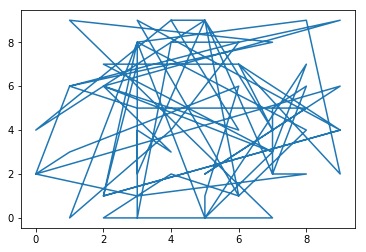

In [3]:
z = data_iter(x_train, y_train)
X, Y = next(z)
X1, Y1 = next(z)
plt.plot(Y.asnumpy(), Y1.asnumpy())

In [45]:
x1 = nd.array([[2, 3, 4], [4, 5, 6]])

with autograd.record():
    x1.attach_grad()
    y = x1 ** 3 + 2 * x1 ** 2 + 7 * x1 + 5

y.backward()

In [48]:
x.grad


[[ 27.  46.  71.]
 [ 71. 102. 139.]]
<NDArray 2x3 @cpu(0)>